Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")
Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
dfBank = pd.read_excel("correctdataformat.xlsx")# data delimeter in csv was ; using the Data import in excel imported in different columns

# EDA

In [3]:
dfBank.info()
dfBank.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The DataFrame does not have any missing values (non-null count is the same as the total count for each column).

In [4]:
dfBank.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


As per the above statistics the age column seems to shows a consistent and reliable data. There seem to be oultliers in balance but we have to be clear are they outliers or anamoly that needs to be captured as per our problem statment.
As per the domain relevance the Campaign related columns dont seem to contribute to our y value but we need to futehr check with different methods.

<AxesSubplot:>

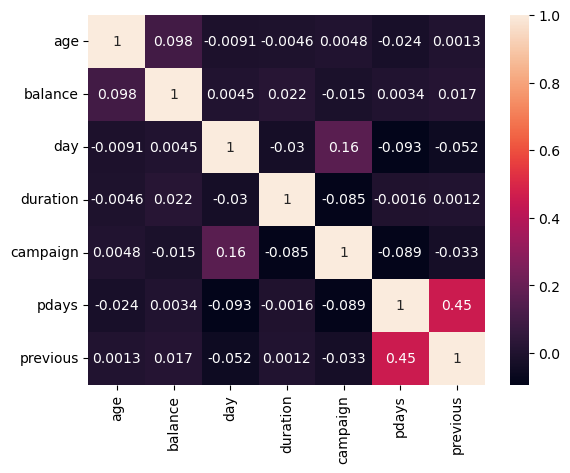

In [5]:
sns.heatmap(dfBank.corr(),annot=True)

In [6]:
from sklearn.model_selection import train_test_split
# x = dfBank.iloc[:,:-1]
# y = dfBank['y']
# x
# y

In [8]:
# Perform one-hot encoding on the categorical features
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
df_encoded = pd.get_dummies(dfBank, columns=categorical_columns, drop_first=True)

# Separate features and target variable
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
17965,49,1415,30,269,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
18299,42,3842,31,130,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10221,37,-119,11,375,11,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32192,56,3498,15,264,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
#Train the model
lg.fit(X_train,y_train)

#Prediction
ypred = lg.predict(X_test)

In [18]:
len(X_test)
len(ypred)

9043

# Model Evaluation

In [19]:
print('Actual Y: ', y_test[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no']
Predict Y: ['no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no']


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.86      9043



Text(50.722222222222214, 0.5, 'Predicted Values')

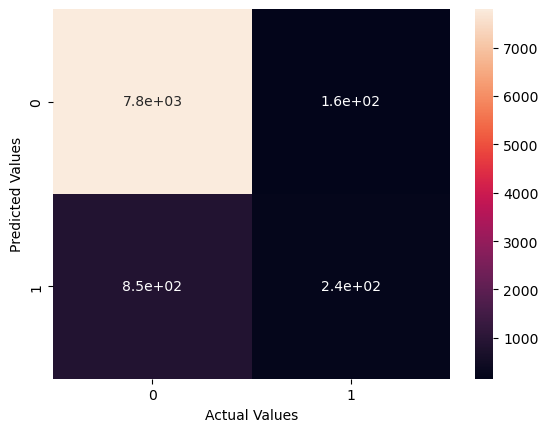

In [22]:
sns.heatmap(confusion_matrix(y_test,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')